# Задача 1.3 

Рассмотрим абсолютно-непрерывное распределение с плотностью $p(x) = \frac{5}{x^6}I\{x > 1\}$. 
Это распределение имеет конечные первые четыре момента, а пятый бесконечный:
$$E\xi = \int_{-\infty}^{+\infty} x p_\xi(x)dx = \int_{1}^{+\infty} \frac{5}{x^5} dx = \frac{5}{4}$$
$$E\xi^2 = \int_{-\infty}^{+\infty} x^2 p_\xi(x)dx = \int_{1}^{+\infty} \frac{5}{x^4} dx = \frac{5}{3}$$
$$E\xi^3 = \int_{-\infty}^{+\infty} x^3 p_\xi(x)dx = \int_{1}^{+\infty} \frac{5}{x^3} dx = \frac{5}{2}$$
$$E\xi^4 = \int_{-\infty}^{+\infty} x^4 p_\xi(x)dx = \int_{1}^{+\infty} \frac{5}{x^2} dx = 5$$
$$E\xi^5 = \int_{-\infty}^{+\infty} x^5 p_\xi(x)dx = \int_{1}^{+\infty} \frac{5}{x} dx = +\infty$$
Эта функция является плотностью распределения, так как она неотрицательна, и интеграл от неё по всей числовой прямой равен 1:
$$\int_{-\infty}^{+\infty} p_\xi(x)dx = \int_{1}^{+\infty} \frac{5}{x^6} dx = 1$$
Найдем дисперсию этого распределения:
$$D\xi = E\xi^2 - (E\xi)^2 = \frac{5}{3} - \left(\frac{5}{4}\right)^2 = \frac{5}{48}$$

In [2]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Сгенерируем выборку из этого распределения размера N = 10000:

In [3]:
n = 10000

In [4]:
class my_distribution(sps.rv_continuous):
    def _pdf(self, x):
       return 5 * (x ** (-6))
distr = my_distribution(a = 1, b = float("inf"), name = 'distr')
sample = distr.rvs(size = n)

Построим график зависимости плотности от x, нанесём на график точки выборки:

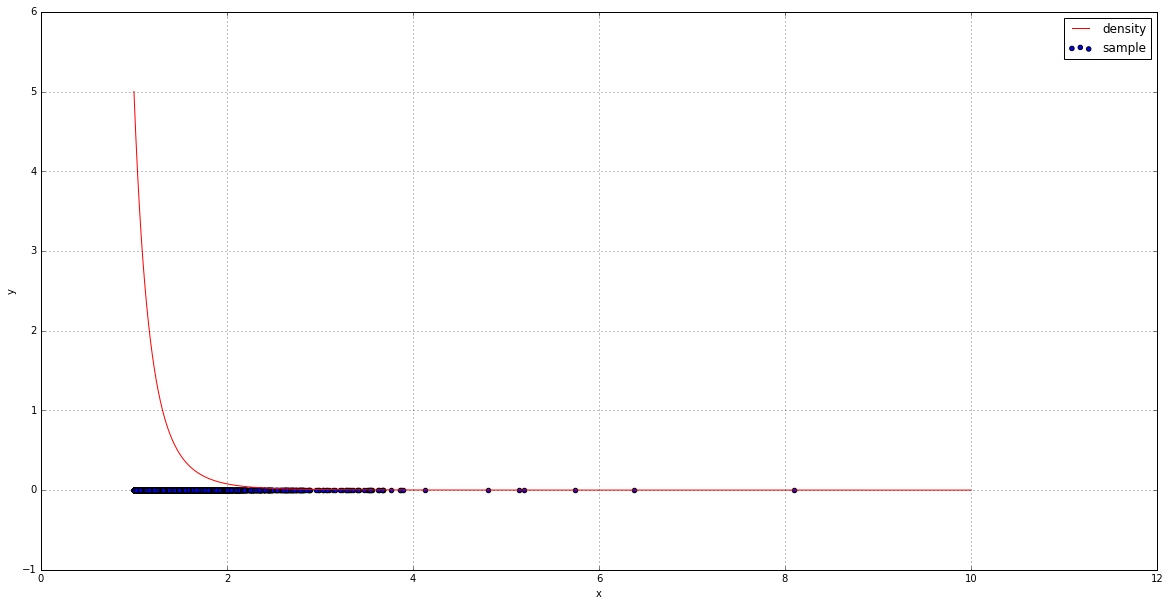

In [5]:
x_arr = np.linspace(1, 10, 10000)

plt.figure(figsize=(20, 10))

plt.scatter(sample, np.zeros(n), label='sample')
plt.plot(x_arr, my_distribution().pdf(x_arr), color='red', label='density')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

Найдем выборочную дисперсию выборки:

In [6]:
s = np.arange(1, n + 1)
var = (sample ** 2).cumsum() / s - (sample.cumsum() / s) ** 2

In [7]:
D = 5. / 48

Построим график зависимости $|S^2 - D\xi|$ от размера выборки n:

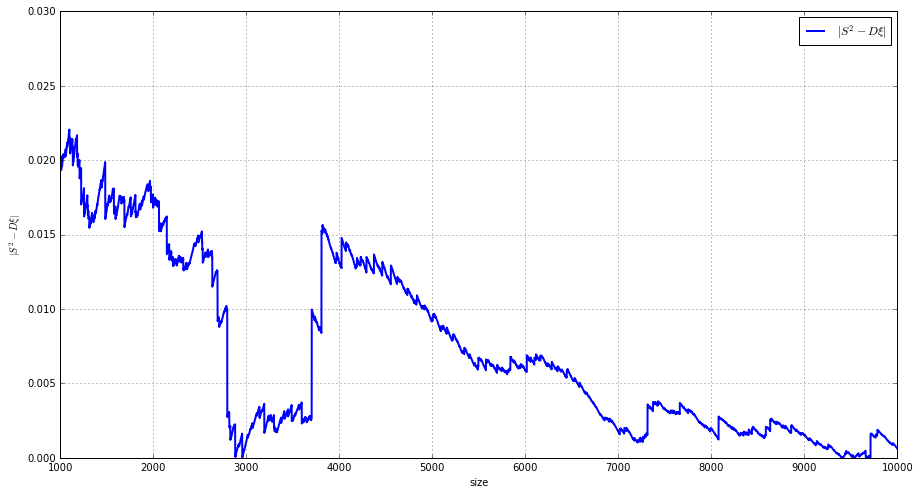

In [8]:
plt.figure(figsize=(15, 8))
plt.plot(s, abs(var - D), color='blue', linewidth=2, label= r'$|S^2 -D\xi|$')

plt.legend()
plt.xlim((1000, n))
plt.ylim((0, 0.03))
plt.xlabel('size')
plt.ylabel(r'$|S^2 - D\xi|$')
plt.grid() 

plt.show()

Из теоретической задачи 4, $S^2$ - смещенная оценка дисперсии. Её математическое ожидание равно $\left(1 - \frac{1}{n}\right)D\xi$. При n стремящемся к бесконечности эта величина стремится к $D\xi$, значит, при больших n оценку можно считать несмещенной. На графике об этом говорит то, что при увеличении n модуль разности между выборочной дисперсией и дисперсией стремится к нулю.

# Распределение Коши

Сгенерируем выборку из распределения Коши:

In [9]:
sample = sps.cauchy.rvs(size = n)

Построим график зависимости плотности распределения Коши, нанесем точки выборки на график:

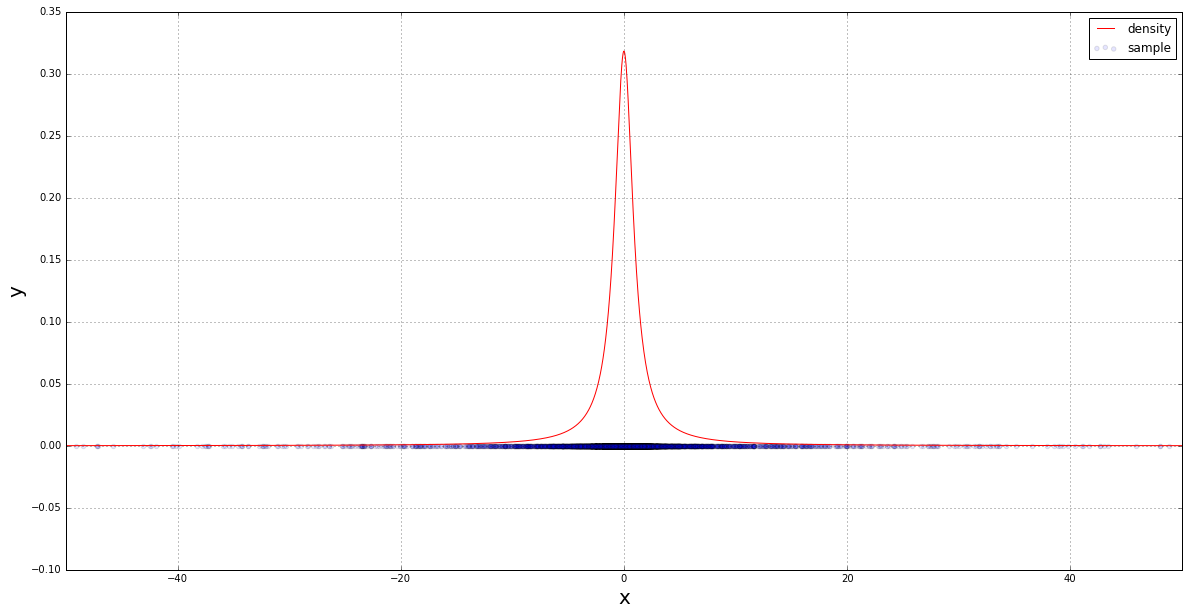

In [11]:
x_arr = np.linspace(-150, 150, 10000)

plt.figure(figsize=(20, 10))

plt.scatter(sample, np.zeros(n), alpha = 0.1
            , label='sample')
plt.plot(x_arr, sps.cauchy.pdf(x_arr), color='red', label='density')

plt.legend()
plt.xlim((-50, 50))
plt.ylim((-0.1, 0.35))
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.grid()

plt.show()

Найдем выборочную дисперсию выборки:

In [14]:
s = np.arange(1, n + 1)
var = (sample ** 2).cumsum() / s - (sample.cumsum() / s) ** 2

Построим график зависимости $S^2$ от размера выборки n:

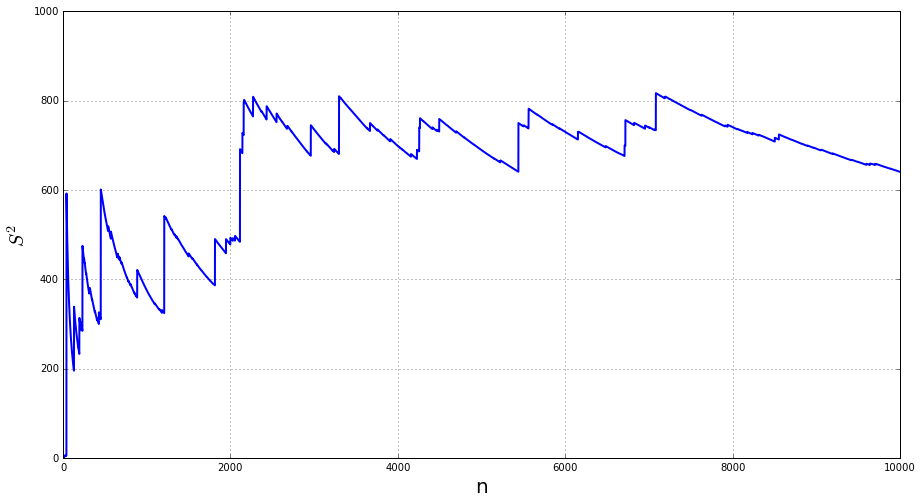

In [18]:
plt.figure(figsize=(15, 8))
plt.plot(s, var, color='blue', linewidth=2)

plt.legend()
plt.xlim((1, n))
plt.ylim((0, 1000))
plt.xlabel('n', fontsize = 20)
plt.ylabel('$S^2$', fontsize = 20)
plt.title('')
plt.grid() 

plt.show()